
### Problem 1. Basic Data Exploration Step


Basic statistical information: 

a. number of impressions;
b. number of clicks; 
c. costs (payprice / 1000); 
d. CTR (clicks/impressions);
e. average Cost Per Mille (CPM) (cost/impression);
f. eCPC (cost/clicks). 

Analysis of various features such as user feedbacks, biddings and so on: 

a. CTR from Weekday and specific Hour;
b. CTR from User's type of device (mobile or desktop); 
c. CTR from Ad exchange; 
d. CTR from Region. 
In total there are 9 advertisers, but for the second question in order to make plots more visuable only 2 biggest by impressions and clicks advertisers were selected (1458, 3386)

In [1]:
# ---1--- 

import pandas as pd

train_df = pd.read_csv('train.csv')

train_df.head()

,click,weekday,hour,bidid,userid,useragent,IP,region,city,adexchange,...,slotheight,slotvisibility,slotformat,slotprice,creative,bidprice,payprice,keypage,advertiser,usertag
0,0,5,22,b7bea80521fdecd95d2d761a38c91c3f09618066,2e880fb7d690cf7377b2e42e701728e3f3c0e4c1,windows_ie,125.37.175.*,2,2,2.0,...,200,2,0,5,a4f763f78ef3eedfe614263b94a8924e,238,5,0f951a030abdaedd733ee8d114ce2944,3427,NaN
1,0,1,20,4f51205475678f5a124bc76b2c54163bf8eaa7eb,3a1fe01360ff8100e7d006b83b77a3e4c01d928c,windows_chrome,171.36.92.*,238,239,1.0,...,250,FourthView,Na,0,10722,294,23,NaN,2821,NaN
2,0,3,13,b604e3fd054a658ab7ced4285ebf2ef54d2bd890,801d18a056b6fe6b06a794aef17fb0d6daff2414,windows_ie,59.46.106.*,40,41,2.0,...,250,2,0,5,798b2d49952d77f1eace9f23c210d0b5,238,24,0f951a030abdaedd733ee8d114ce2944,3427,"10052,10006,13866,10110"
3,0,6,23,0348beeae93e561584c3b50fc9e7746a33048ad7,0d6eaf2259699990e38a1fc5116f112070b9ecdc,windows_ie,114.250.226.*,1,1,1.0,...,600,2,1,0,cb7c76e7784031272e37af8e7e9b062c,300,25,bebefa5efe83beee17a3d245e7c5085b,1458,"13866,10063,10111"
4,0,5,6,268149c1789bce2bc9798ffd97ec431219bafeb3,a239d9bb642460d974ba67f85e63b8d3e214da0e,windows_ie,183.63.192.*,216,233,2.0,...,90,OtherView,Na,133,7330,277,133,NaN,2259,NaN


In [2]:
#basic statistics table
#aggregation by advertisers

train_df['cost'] = train_df.payprice / 1000

stat_data =train_df.groupby('advertiser').agg({'advertiser':'count', 'click':'sum', 'cost':'sum'})


stat_data['CTR'] = stat_data.click / stat_data.advertiser * 100  
stat_data['CPM'] = stat_data.cost / stat_data.advertiser * 1000
stat_data['eCPC'] = stat_data.cost / stat_data.click

stat_data = stat_data.rename(index=str, columns={"advertiser": "Impressions", "click": "Clicks", "cost":"Costs"})
stat_data.head(10)


,Impressions,Clicks,Costs,CTR,CPM,eCPC
advertiser,,,,,,
1458,492353,385,33968.736,0.078196,68.992646,88.230483
2259,133673,43,12428.238,0.032168,92.974931,289.028791
2261,110122,36,9873.779,0.032691,89.662184,274.271639
2821,211366,131,18828.044,0.061978,89.077922,143.725527
2997,49829,217,3129.267,0.435489,62.800116,14.420585
3358,264956,202,22447.231,0.076239,84.720599,111.124906
3386,455041,320,34931.823,0.070323,76.766320,109.161947
3427,402806,272,30458.711,0.067526,75.616329,111.980555
3476,310835,187,23918.779,0.060161,76.950083,127.907909


In [3]:
#total aggregation

stat_data_total =stat_data.agg({'Impressions':'sum', 'Clicks':'sum', 'Costs':'sum'})

print('Total: ', '\n',
      'Impressions: ', stat_data_total.Impressions, '\n',
      'Clicks: ', stat_data_total.Clicks, '\n',
      'Costs: ', stat_data_total.Costs,'\n',
      'CTR (%): ', stat_data_total.Clicks / stat_data_total.Impressions, '\n',
      'CPM: ', stat_data_total.Costs / stat_data_total.Impressions * 1000, '\n',
      'eCPC: ', stat_data_total.Costs / stat_data_total.Clicks)



Total:  
 Impressions:  2430981.0 
 Clicks:  1793.0 
 Costs:  189984.60800005414 
 CTR (%):  0.0007375623256619447 
 CPM:  78.15141623898094 
 eCPC:  105.95906748469277


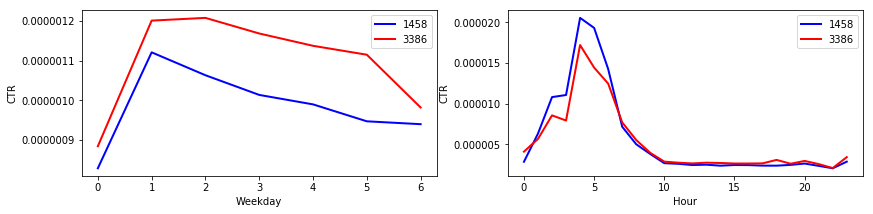

In [5]:
# ---2--- 

# 1458 and 3386 only

import matplotlib.pyplot as plt

plt.figure(figsize=(14,14))

# CTR vs Weekday

temp1 = train_df[train_df.advertiser == 1458].groupby('weekday', as_index=False).agg({'advertiser':'count', 'cost':'mean'})
temp2 = train_df[train_df.advertiser == 3386].groupby('weekday', as_index=False).agg({'advertiser':'count', 'cost':'mean'})

temp1['CTR'] = temp1['cost']/temp1['advertiser']
temp2['CTR'] = temp2['cost']/temp1['advertiser']

plt.subplot(421)
plt.plot('weekday', 'CTR', data=temp1, marker='', color='blue', linewidth=2, label='1458')
plt.plot('weekday', 'CTR', data=temp2, marker='', color='red', linewidth=2, label='3386')
plt.legend()
plt.xlabel('Weekday')
plt.ylabel('CTR')

del temp1, temp2

# CTR vs Hour

temp1 = train_df[train_df.advertiser == 1458].groupby('hour', as_index=False).agg({'advertiser':'count', 'cost':'mean'})
temp2 = train_df[train_df.advertiser == 3386].groupby('hour', as_index=False).agg({'advertiser':'count', 'cost':'mean'})

temp1['CTR'] = temp1['cost']/temp1['advertiser']
temp2['CTR'] = temp2['cost']/temp1['advertiser']

plt.subplot(422)
plt.plot('hour', 'CTR', data=temp1, marker='', color='blue', linewidth=2, label='1458')
plt.plot('hour', 'CTR', data=temp2, marker='', color='red', linewidth=2, label='3386')
plt.legend()
plt.xlabel('Hour')
plt.ylabel('CTR')

del temp1, temp2

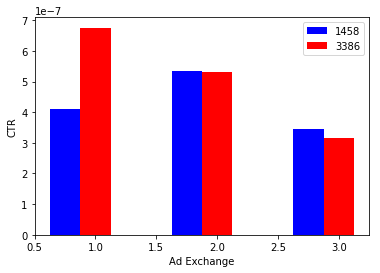

In [8]:

# CTR vs Ad Exchange

temp1 = train_df[train_df.advertiser == 1458].groupby('adexchange', as_index=False).agg({'advertiser':'count', 'cost':'mean'})
temp2 = train_df[train_df.advertiser == 3386].groupby('adexchange', as_index=False).agg({'advertiser':'count', 'cost':'mean'})

temp1['CTR'] = temp1['cost']/temp1['advertiser']
temp2['CTR'] = temp2['cost']/temp1['advertiser']

# these calculations were made in order to avoid overlapping in plots

temp1['adexchange']=temp1['adexchange']-0.25
temp2['adexchange']=temp1['adexchange']+0.25

#plots 

plt.bar('adexchange', 'CTR', data = temp1, color = 'blue', label = '1458', width = 0.25)
plt.bar('adexchange', 'CTR', data = temp2, color = 'red', label = '3386', width = 0.25) 
plt.xlabel('Ad Exchange')
plt.ylabel('CTR')
plt.legend()

del temp1, temp2


In [9]:

# new column with users' OS

train_df.loc[train_df['useragent'].str.contains("ios"), 'OS'] = 'iOS'
train_df.loc[train_df['useragent'].str.contains("android"), 'OS'] = 'Android'
train_df.loc[train_df['useragent'].str.contains("windows"), 'OS'] = 'Windows'
train_df.loc[train_df['useragent'].str.contains("linux"), 'OS'] = 'Linux'
train_df.loc[train_df['useragent'].str.contains("mac"), 'OS'] = 'Mac'
train_df.OS = train_df.OS.fillna('Others')

#new column with users' browser

train_df.loc[train_df['useragent'].str.contains("chrome"), 'Browser'] = 'Chrome'
train_df.loc[train_df['useragent'].str.contains("firefox"), 'Browser'] = 'Firefox'
train_df.loc[train_df['useragent'].str.contains("safari"), 'Browser'] = 'Safari'
train_df.loc[train_df['useragent'].str.contains("maxthon"), 'Browser'] = 'Maxthon'
train_df.loc[train_df['useragent'].str.contains("IE"), 'Browser'] = 'IE'
train_df.Browser = train_df.Browser.fillna('Others')


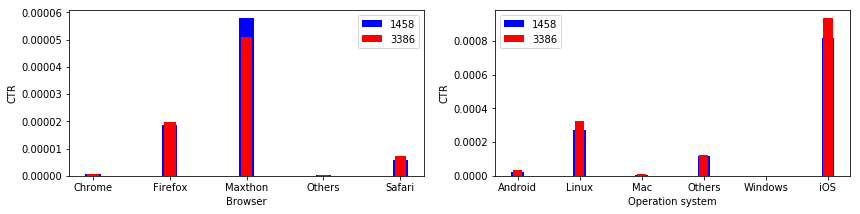

In [11]:
#CTR vs users' browser 

plt.figure(figsize=(14,14))

temp1 = train_df[train_df.advertiser == 1458].groupby('Browser', as_index=False).agg({'advertiser':'count', 'cost':'mean'})
temp2 = train_df[train_df.advertiser == 3386].groupby('Browser', as_index=False).agg({'advertiser':'count', 'cost':'mean'})

temp1['CTR'] = temp1['cost']/temp1['advertiser']
temp2['CTR'] = temp2['cost']/temp1['advertiser']


#plots

plt.subplot(421)
plt.bar('Browser', 'CTR', data = temp1, color = 'blue', label = '1458', width = 0.20)
plt.bar('Browser', 'CTR', data = temp2, color = 'red', label = '3386', width = 0.15) 
plt.xlabel('Browser')
plt.ylabel('CTR')
plt.legend()

del temp1, temp2

#CTR vs users' OS

temp1 = train_df[train_df.advertiser == 1458].groupby('OS', as_index=False).agg({'advertiser':'count', 'cost':'mean'})
temp2 = train_df[train_df.advertiser == 3386].groupby('OS', as_index=False).agg({'advertiser':'count', 'cost':'mean'})

temp1['CTR'] = temp1['cost']/temp1['advertiser']
temp2['CTR'] = temp2['cost']/temp1['advertiser']


#plots

plt.subplot(422)
plt.bar('OS', 'CTR', data = temp1, color = 'blue', label = '1458', width = 0.20)
plt.bar('OS', 'CTR', data = temp2, color = 'red', label = '3386', width = 0.15) 
plt.xlabel('Operation system')
plt.ylabel('CTR')
plt.legend()

del temp1, temp2




In [12]:
del train_df